In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
credit = pd.read_csv("C:/Users/GOWTHAM/OneDrive/Desktop/Credit_report.csv")

In [3]:
credit.size

309969

In [4]:
credit.shape

(9999, 31)

In [5]:
credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
credit.info

<bound method DataFrame.info of         id        V1        V2        V3        V4        V5        V6  \
0        0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1        1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2        2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3        3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4        4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...    ...       ...       ...       ...       ...       ...       ...   
9994  9994  0.876370 -0.282751  1.247432  0.285311  0.213093  0.786679   
9995  9995  0.974311 -0.251291  0.511758  0.283440  0.443896  0.372071   
9996  9996  1.015477 -0.427838  1.100594 -0.455191 -0.072156 -0.173436   
9997  9997 -0.153758 -0.205571  2.281443 -0.832271 -0.079802  0.101403   
9998  9998 -0.303541  0.009300  1.491417 -0.973367 -0.090880 -0.232293   

            V7        V8        V9  ...       V21       V22       V23  \
0     

##Data Preprocessing

In [7]:
missingvalues = credit.isnull().sum()
missingvalues

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# The first step in binary classification
# We need to identify the ratio of class if the data is imbalanced or not by using value counts

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

df= pd.DataFrame(credit)

# Check the distribution of the class column which is our target

class_counts = df['Class'].value_counts()
print(f"Class distribution:\n{class_counts}")




Class distribution:
0    9961
1      38
Name: Class, dtype: int64


##### Okay now the ratio is practically imbalanced data as we see non-fraudulent transactions outnumbers fraudulent transactions 
##### This dataset might impact the accuracy score and might lead to complications in the output
##### To Overcome this imbalanced data, we need to choose techniques like overfitting or underfitting

In [9]:
# Here we might consider SMOTE(Synthetic Minority Over-Sampling Technique) to handle imbalanced data. 
# It creates synthetic samples for fraudulent transactions which are less in number

smote = SMOTE(random_state=42)
X = credit.drop(['id', 'Class'], axis=1)
y = credit['Class']
X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
print(f"Resampled class distribution: {Counter(y_resampled)}")


Resampled class distribution: Counter({0: 9961, 1: 9961})


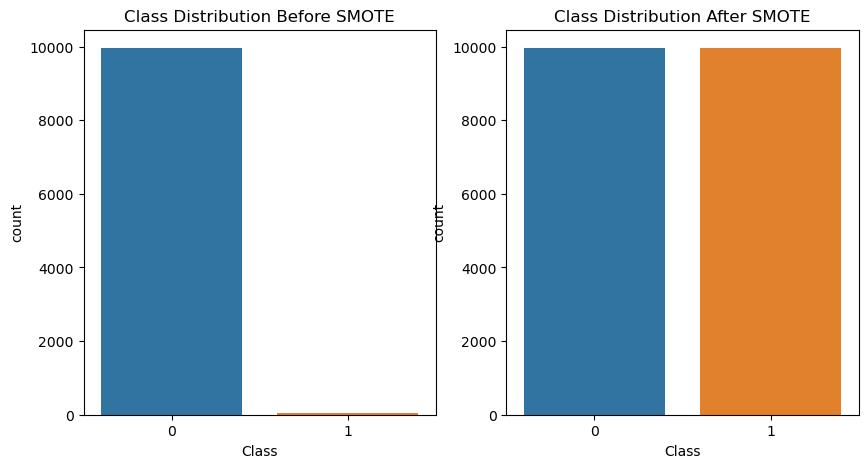

In [11]:
# Before SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')

plt.show()

##### Now we see that class is equally distributed after SMOTE technique

In [12]:
#After the sampled data is being returned, I use standard scaler to improve the model performance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Exploratory Data Analysis (EDA)

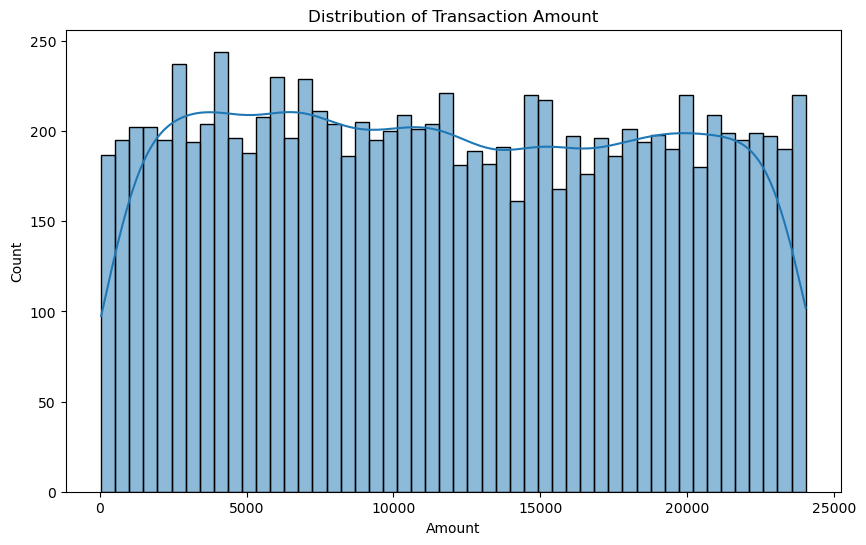

In [13]:
# Example: Distribution of `Amount`
plt.figure(figsize=(10, 6))
sns.histplot(credit['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

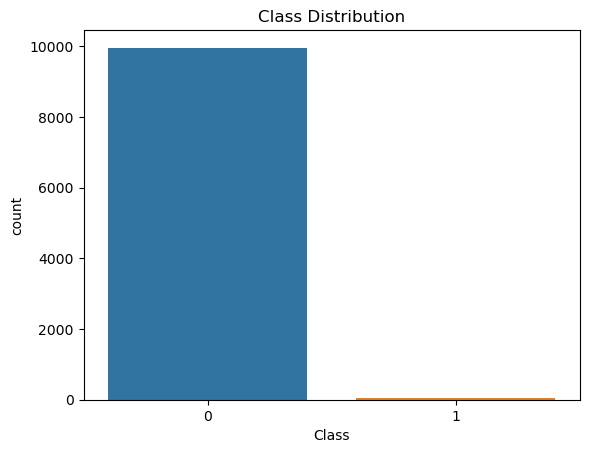

In [14]:
# Lets Visualize the class distribution using seaborn for better understanding to non-technical audiences

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

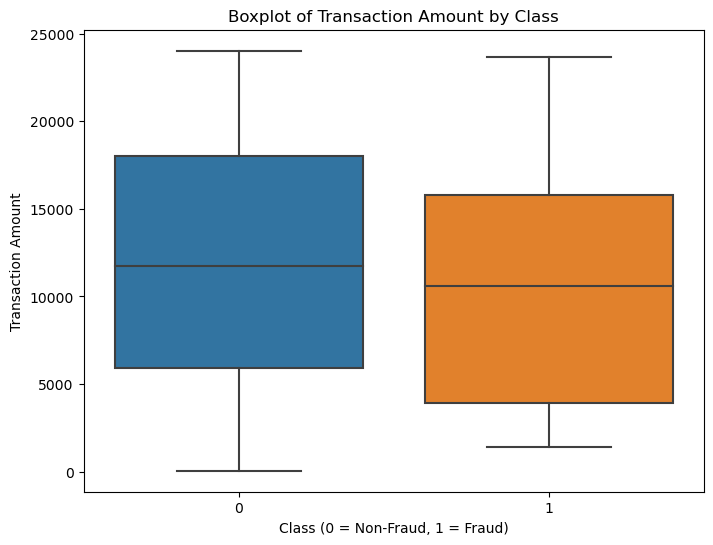

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=credit)
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

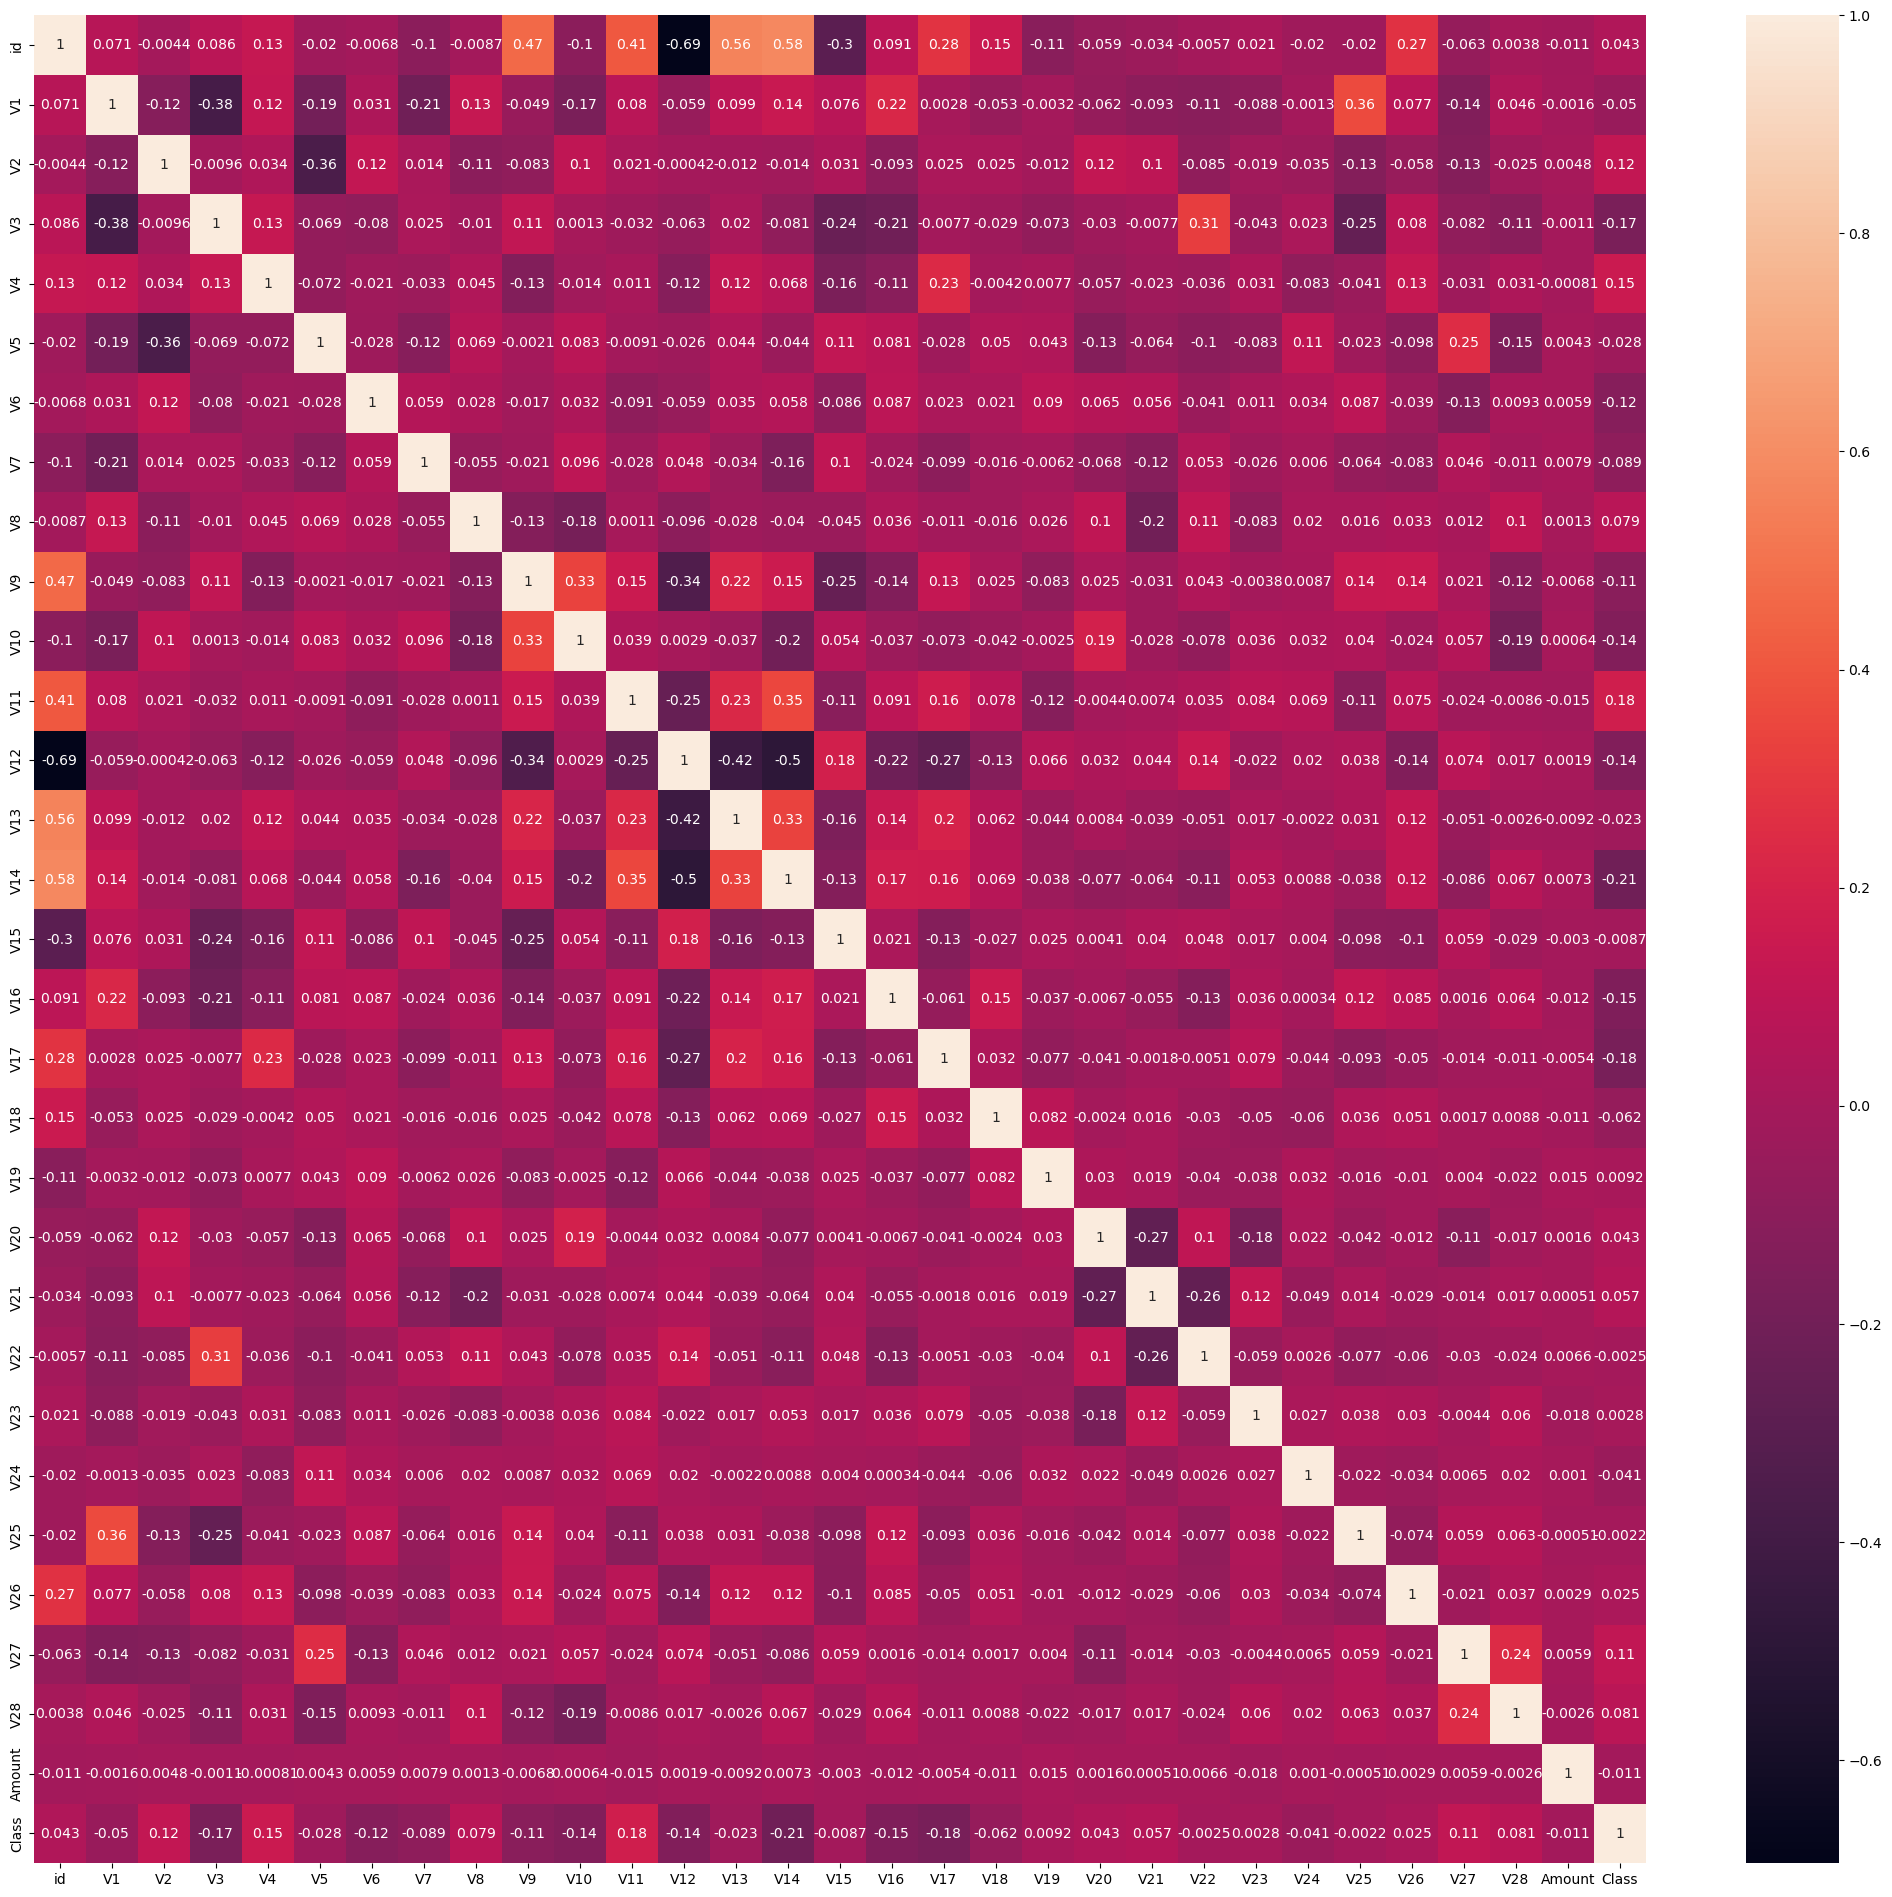

In [16]:
import seaborn as sns
correlation_matrix = credit.corr()
plt.figure(figsize=(26, 24))

sns.heatmap(correlation_matrix, annot=True)
plt.show()

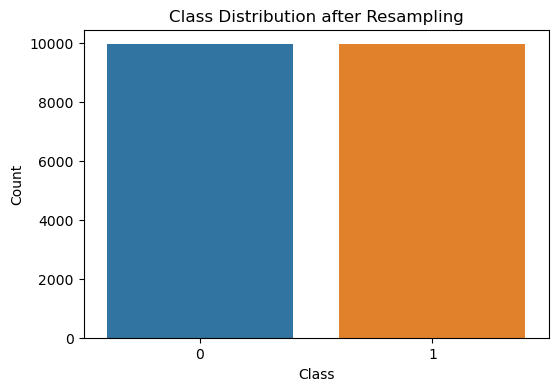

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Model Building and Evaluation

In [18]:
#Now lets split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

##### random forest classifier model


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

y_predict_rf = model_rf.predict(X_test)
accuracy= accuracy_score(y_test,y_predict_rf)

print(f"Accuracy: {accuracy}")
print("Random Forest:")
print(classification_report(y_test, y_predict_rf))
print('ROC AUC:', roc_auc_score(y_test, y_predict_rf))

Accuracy: 1.0
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3017
           1       1.00      1.00      1.00      2960

    accuracy                           1.00      5977
   macro avg       1.00      1.00      1.00      5977
weighted avg       1.00      1.00      1.00      5977

ROC AUC: 1.0


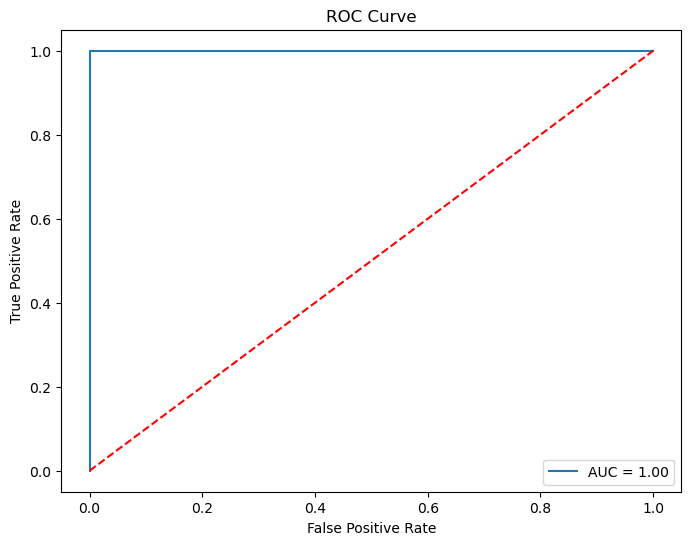

In [21]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

##### Cat Boost Model 

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model2 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0, border_count = 254) 


In [23]:
model2.fit(X_train, y_train)

In [24]:
y_predict_2 = model2.predict(X_test)
accuracy2= accuracy_score(y_test,y_predict_2)


In [25]:
print(f"Accuracy: {accuracy2}")
print(classification_report(y_test, y_predict_2))

Accuracy: 0.9994980759578384
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3017
           1       1.00      1.00      1.00      2960

    accuracy                           1.00      5977
   macro avg       1.00      1.00      1.00      5977
weighted avg       1.00      1.00      1.00      5977



##### XGBoost classifier model 

In [26]:
from xgboost import XGBClassifier

In [27]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13945, 29)
Shape of X_test: (5977, 29)
Shape of y_train: (13945,)
Shape of y_test: (5977,)


In [28]:
xgbmodel = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgbmodel.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
y_predict_3 = xgbmodel.predict(X_test)
y_pred_proba = xgbmodel.predict_proba(X_test)[:, 1]

In [30]:
print("Length of y_test:", len(y_test))  
print("Length of y_pred_proba_xgb:", len(y_pred_proba))  

Length of y_test: 5977
Length of y_pred_proba_xgb: 5977


In [31]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict_3))

Confusion Matrix:
[[3013    4]
 [   0 2960]]


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_predict_3))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3017
           1       1.00      1.00      1.00      2960

    accuracy                           1.00      5977
   macro avg       1.00      1.00      1.00      5977
weighted avg       1.00      1.00      1.00      5977



In [33]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC Score: 1.0


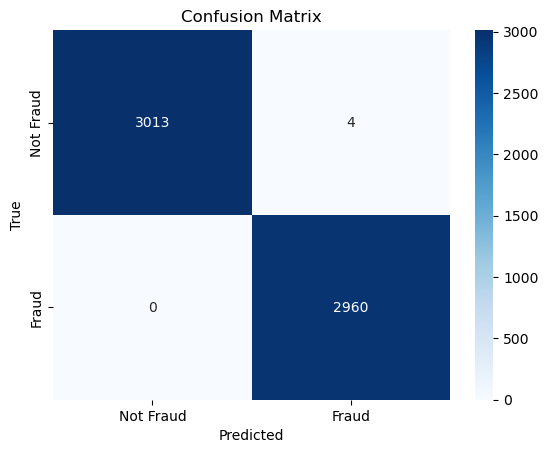

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_predict_3):
    cm = confusion_matrix(y_true, y_predict_3)
    sns.heatmap(cm, annot=True, fmt="d", cmap= "Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_predict_3)

In [35]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    


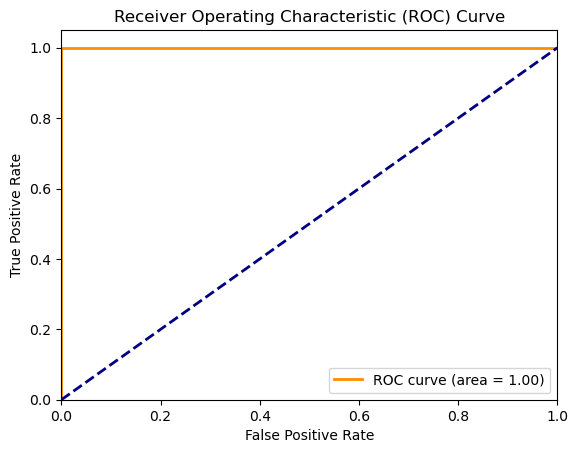

In [36]:
plot_roc_curve(y_test, y_pred_proba)


## Model Improvement 

In [42]:
from sklearn.model_selection import GridSearchCV

##Including maximum parameters so as to avoid overfitting or underfitting of values

param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [ 10, 20, 30],
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [43]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X_train, y_train, cv = 5)

print(f'cross-validation scores: {cv_scores}')
print(f'mean score: {cv_scores.mean()}')

cross-validation scores: [0.99964145 0.99892435 1.         1.         1.        ]
mean score: 0.9997131588382933


In [44]:
train_accuracy = model_rf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [45]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_predict_rf)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


In [46]:
#Some important features prioritized accordingly with the score from highest to lowest

importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

   Feature  Importance
13     V14    0.213795
9      V10    0.165353
11     V12    0.164680
3       V4    0.103835
2       V3    0.098995
1       V2    0.037744
15     V16    0.035392
16     V17    0.035078
10     V11    0.029489
20     V21    0.028500
6       V7    0.018515
5       V6    0.017051
27     V28    0.013260
8       V9    0.009188
19     V20    0.005663
22     V23    0.003460
14     V15    0.003219
26     V27    0.003086
4       V5    0.002633
25     V26    0.002071
17     V18    0.002052
0       V1    0.001699
21     V22    0.001262
18     V19    0.001019
12     V13    0.000802
23     V24    0.000769
28  Amount    0.000665
7       V8    0.000470
24     V25    0.000254


In [48]:
import joblib

In [49]:
joblib.dump(model_rf, 'Best_random_forest.pkl')


['Best_random_forest.pkl']